Dask Array implements a subset of the NumPy ndarray interface using blocked algorithms, cutting up the large array into many small arrays. This lets us compute on arrays larger than memory using all of our cores. We coordinate these blocked algorithms using dask graphs.  

Dask array used in fields like atmospheric and oceanographic science, large scale imaging, genomics, numerical algorithms for optimization or statistics , and more.

In [4]:
import dask
import dask.bag as db
import dask.array as da
import numpy as np
from dask import delayed

`dask.array.from_array(x, chunks, name=None, lock=False, asarray=True, fancy=True, getitem=None)` create a dask array from something that looks like an array.  Input must have a `.shape` and support numpy-style slicing  
`dask.array.from_delayed(value, shape, dtype, name=None)` create a dask array from a dask delayed value, this routine is useful for constructing dask arrays in an ad-hoc fashion using dask delayed, particularly when combined with stack and concatenate.

In [7]:
value = delayed(np.ones)(5)
array = da.from_delayed(value, (5,), float)
array

dask.array<from-value, shape=(5,), dtype=float64, chunksize=(5,)>

In [8]:
array.compute()

array([1., 1., 1., 1., 1.])

`dask.array.store(sources, targets, lock=True, regions=None, compute=True, return_stored=False, **kwargs)` store dask arrays in array-like objects (overwrites data in target).

`dask.array.topk(k, x)` the top k elements of an array.  Returns the k greatest elements of the array in sorted order.  Only works on arrays of a single dimension.

In [10]:
x = np.array([5, 1, 3, 6])
d = da.from_array(x, chunks=2)
d.topk(2).compute()

array([6, 5])

`dask.array.coarsen(reduction, x, axes, trim_excess=False)` coarsen array by applying reduction to fixed size neighborhoods.  `reduction` is a function like np.sum or np.mean, `x: np.ndarray` is the array to be coarsened.  `axes:dict` mapping of axis to coarsening factor.

In [20]:
x = np.array([1, 2, 3, 4, 5, 6])

In [21]:
d = da.from_array(x, chunks=2)

In [24]:
da.coarsen(np.sum, d, {0: 2}).compute()

array([ 3,  7, 11])

In [25]:
da.coarsen(np.max, d, {0: 2}).compute()

array([2, 4, 6])

In [49]:
x = np.arange(24).reshape((4, 6))
d = da.from_array(x, chunks=6)

In [50]:
x

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [52]:
da.coarsen(np.min, d, {0: 2, 1: 3}, trim_excess=True).compute() # you  must avoid excess elements explicitly

array([[ 0,  3],
       [12, 15]])

`dask.array.stack(seq, axis=0)` stack arrays along a new axis.  Given a sequence of dask Arrays, form a new dask array by stacking them along a new dimension (axis=0 by default)

In [61]:
data = [da.from_array(np.ones((4, 4)), chunks=(2, 2))
        for i in range(3)]

In [62]:
x = da.stack(data, axis=0)

In [63]:
x.shape

(3, 4, 4)

In [64]:
x.compute()

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [65]:
da.stack(data, axis=1).shape

(4, 3, 4)

In [66]:
da.stack(data, axis=1).compute()

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [67]:
da.stack(data, axis=-1).shape

(4, 4, 3)

In [68]:
da.stack(data, axis=-1).compute()

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

`dask.array.concatenate(seq, axis=0, allow_unknown_chunksizes=False)` concatenate arrays along an existing axis, given a sequence of dask arrays, form a new dask array by stacking them along an existing dimension (axis=0 by default)

In [69]:
data = [da.from_array(np.ones((4, 4)), chunks=(2, 2))
        for i in range(3)]

In [73]:
list(data)

[dask.array<array, shape=(4, 4), dtype=float64, chunksize=(2, 2)>,
 dask.array<array, shape=(4, 4), dtype=float64, chunksize=(2, 2)>,
 dask.array<array, shape=(4, 4), dtype=float64, chunksize=(2, 2)>]

In [74]:
x = da.concatenate(data, axis=0)

In [76]:
x.compute(), x.shape

(array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]), (12, 4))

In [77]:
da.concatenate(data, axis=1).compute(), da.concatenate(data, axis=1).shape

(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]), (4, 12))

`dask.array.all(a, axis=None, out=None, keepdims=False)` test whether all array elements along a given axis evalute to true

`dask.array.apply_along_axis(func1d, axis, arr, *args, **kwargs)` Apply a function to 1-D slices along the given axis.  Execute func1d(a, *args) where func1d operates on 1-D arrays and a is a 1-D slice of arr along axis.

In [79]:
my_func = lambda x: (x[0] + x[-1]) * 0.5
b = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [82]:
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [80]:
np.apply_along_axis(my_func, 0, b) # cols

array([4., 5., 6.])

In [81]:
np.apply_along_axis(my_func, 1, b) # rows

array([2., 5., 8.])

In [83]:
b = np.array([[8,1,7], [4,3,9], [5,2,6]])
np.apply_along_axis(sorted, 1, b)

array([[1, 7, 8],
       [3, 4, 9],
       [2, 5, 6]])

`dask.array.apply_over_axes(func, a, axes)` apply a function repeatedly over multiple axes.  func is called as res = func(a, axis), where axis is the first element of axes. The result res of the function call must have either the same dimensions as a or one less dimension. If res has one less dimension than a, a dimension is inserted before axis. The call to func is then repeated for each axis in axes, with res as the first argument.

In [87]:
a = np.arange(24).reshape(2,3,4) # reshape into 2 (3,4) matrices
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [88]:
np.apply_over_axes(np.sum, a, [0,2]) # Sum over axes 0 and 2. The result has same number of dimensions as the original array

array([[[ 60],
        [ 92],
        [124]]])

`dask.array.arange(*args, **kwargs)` return evenly spaced values from start to stop with step size step.

`dask.array.argmax(a, axis=None, out=None)` returns the indices of the maximum values along an axis; `argmin` is just the opposite

In [94]:
a = np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [90]:
np.argmax(a)

5

In [97]:
np.argmax(a, axis=0) # indexes along cols

array([1, 1, 1])

In [98]:
np.argmax(a, axis=1) # indexes along rows

array([2, 2])

`dask.array.around(a, decimals=0, out=None)` evenly round to the given number of decimals.

In [99]:
np.around([0.37, 1.64])

array([0., 2.])

In [100]:
np.around([0.37, 1.64], decimals=1)

array([0.4, 1.6])

In [101]:
np.around([0.37, 1.64], decimals=2)

array([0.37, 1.64])

`dask.array.asarray(a)` cast input as a dask array

In [102]:
x = np.arange(3)
da.asarray(x)

dask.array<array, shape=(3,), dtype=int64, chunksize=(3,)>

In [103]:
da.asarray(x).compute()

array([0, 1, 2])

`dask.array.bincount(x, weights=None, minlength=None)` count the number of occurrences of each value in an array of non-negative integers.  The number of bins (of size 1) is one larger than the largest value in x. If minlength is specified, there will be at least this number of bins in the output array (though it will be longer if necessary, depending on the contents of x). Each bin gives the number of occurrences of its index value in x. If weights is specified the input array is weighted by it, i.e. if a value `n` is found at position `i`, `out[n] += weight[i]` instead of `out[n] += 1`.

In [104]:
np.bincount(np.arange(5))

array([1, 1, 1, 1, 1])

In [105]:
np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))

array([1, 3, 1, 1, 0, 0, 0, 1])

In [106]:
w = np.array([0.3, 0.5, 0.2, 0.7, 1., -0.6]) # weights
x = np.array([0, 1, 1, 2, 2, 2])
np.bincount(x,  weights=w)

array([0.3, 0.7, 1.1])

`dask.array.broadcast_to(x, shape, chunks=None)` broadcast an array to a new shape  

`dask.array.ceil(x[, out])` return the ceiling of the input, elementwise where the ceiling of a scalar x is the smallest integer `i`, such that `i >= x`

In [107]:
a = np.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])  
np.ceil(a)

array([-1., -1., -0.,  1.,  2.,  2.,  2.])

In [108]:
np.floor(a)

array([-2., -2., -1.,  0.,  1.,  1.,  2.])

`dask.array.clip(*args, **kwargs)` (clip) limit the values in an array, given an interval, values outside the interval are clipped to the interval edges.  [0, 1]

In [110]:
a = np.arange(10)
np.clip(a, 1, 8)

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 8])

`dask.array.concatenate(seq, axis=0, allow_unknown_chunksizes=False)` concatenate arrays along an existing axis, given a sequence of dask arrays, form a new dask array by stacking them along an existing dimension (axis=0 default)

In [118]:
data = [da.from_array(np.ones((4, 4)), chunks=(2, 2)) for i in range(3)]
data

[dask.array<array, shape=(4, 4), dtype=float64, chunksize=(2, 2)>,
 dask.array<array, shape=(4, 4), dtype=float64, chunksize=(2, 2)>,
 dask.array<array, shape=(4, 4), dtype=float64, chunksize=(2, 2)>]

In [116]:
x = da.concatenate(data, axis=0)
x

dask.array<concatenate, shape=(12, 4), dtype=float64, chunksize=(2, 2)>

In [117]:
x.compute()

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

`dask.array.cos(x[, out]` cosine element-wise

`dask.array.count_nonzero(a)` counts the number of non-zero values in the array

In [120]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [121]:
np.count_nonzero(np.eye(4))

4

`dask.array.cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None)` estimate a covariance matrix, given data and weights.

`dask.array.cumprod(a, axis=None, dtype=None, out=None)` return the cumulative product of elements along a given axis.
`cumsum()` is similarly the sum

In [124]:
a = np.array([1,2,3,4,5]) # aka factorial if in order
np.cumprod(a)

array([  1,   2,   6,  24, 120])

In [125]:
a = np.array([[1, 2, 3], [4, 5, 6]])
np.cumprod(a, axis=0)

array([[ 1,  2,  3],
       [ 4, 10, 18]])

In [126]:
np.cumprod(a, axis=1)

array([[  1,   2,   6],
       [  4,  20, 120]])

`dask.array.deg2rad(x[, out])` convert angles from degrees to radians  
`dask.array.rad2deg(x[, out])` convert angles from radians to degrees  
`dask.array.degrees(x[, out])` same as above

In [127]:
rad = np.arange(12.)*np.pi/6
np.degrees(rad)

array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.,
       330.])

`dask.array.diff(a, n=1, axis=-1)` calculate the n-th discrete difference along given axis.  The first difference is given by `out[n] = a[n + 1] - a[n]` along a given axis. `n` is the number of times values are differenced

In [128]:
x = np.array([1, 2, 4, 7, 0])
np.diff(x)

array([ 1,  2,  3, -7])

In [129]:
np.diff(x, n=2)

array([  1,   1, -10])

In [130]:
x = np.array([[1, 3, 6, 10], [0, 5, 6, 8]])
np.diff(x)

array([[2, 3, 4],
       [5, 1, 2]])

`dask.array.digitize(x, bins, right=False)` return the indices of the bins to which each value in input array belongs

In [137]:
x = np.array([0.2, 6.4, 3.0, 1.6, 20])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)

In [138]:
inds

array([1, 4, 3, 2, 5])

`dask.array.dot(a, b, out=None)` dot product of two arrays.  For 2-D arrays it is equivalent to matrix multiplication, for 1-D arrays it is equivalent to inner product of vectors.  For N dimensions, it is a sum product over the last axist of a and the second to last of b. `dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])`

`dask.array.exp(x[, out])` calculate the exponential of all elements in the input array

In [139]:
import matplotlib.pyplot as plt  
%matplotlib inline

In [140]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)  
xx = x + 1j * x[:, np.newaxis] # a + ib over complex plane  
out = np.exp(xx)  

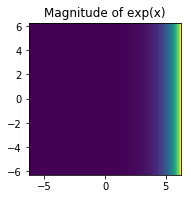

In [142]:
plt.subplot(121)  
plt.imshow(np.abs(out),extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
plt.title('Magnitude of exp(x)');

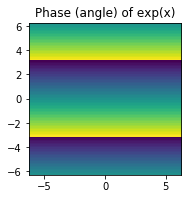

In [144]:
plt.subplot(122)  
plt.imshow(np.angle(out), extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
plt.title('Phase (angle) of exp(x)');

`dask.array.expm1(x[, out])` calculate `exp(x) - 1` for all elements in the array.  
`dask.array.log1p(x[, out])` calculate `log(1 + x)` for all elements in the array (inverse expm1)

`dask.array.eye(N, chunks, M=None, k=0, dtype=<class 'float'>)` return 2-D array identity matrix

`dask.array.fabs(x[, out])` compute the absolute values element-wise.  function returns the absolute values (positive magnitude) of the data in x. Complex values are not handled, use absolute to find the absolute values of complex data.

In [145]:
np.fabs([-1.2, 1.2])

array([1.2, 1.2])

In [146]:
np.fabs([-1.2, 1.2, -3])

array([1.2, 1.2, 3. ])

`dask.array.fix(*args, **kwargs)` round to nearest integer towards zero (ceil) 

In [147]:
np.fix([2.1, 2.9, -2.1, -2.9])

array([ 2.,  2., -2., -2.])

In [149]:
A = np.diag([1.,2.,3.])
A

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

In [150]:
np.rot90(A)

array([[0., 0., 3.],
       [0., 2., 0.],
       [1., 0., 0.]])

In [152]:
np.rot90(np.rot90(A))

array([[3., 0., 0.],
       [0., 2., 0.],
       [0., 0., 1.]])

`dask.array.fmax(x1, x2[, out])` elementwise maximum (`fmin` for minimum); returning the max value comparing 2 arrays

In [153]:
np.fmax([2, 3, 4], [1, 5, 2])  

array([2, 5, 4])

In [154]:
np.fmin([2, 3, 4], [1, 5, 2])  

array([1, 3, 2])

`dask.array.fmod(x1, x2[, out])` return the element-wise remainder of division.

In [157]:
np.fmod([-3, -2, -1, 1, 2, 3], 2)

array([-1,  0, -1,  1,  0,  1])

In [158]:
np.fmod([5, 3], [2, 2.])  

array([1., 1.])

`dask.array.fromfunction(function, shape, **kwargs)` construct an array by executing a function over each coordinate. Where the resulting array has a value `fn(x, y, z)` at coordinate `(x, y, z)`

In [159]:
np.fromfunction(lambda i, j: i + j, (3, 3), dtype=int)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [160]:
np.fromfunction(lambda i, j: i + j, (3, 4), dtype=int)

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])

`dask.array.frompyfunc(func, nin, nout)` takes an arbitrary Python function and returns a Numpy ufunc.

In [162]:
oct_array = np.frompyfunc(oct, 1, 1)
oct_array

<ufunc '? (vectorized)'>

In [163]:
oct_array(np.array((10, 30, 100)))

array(['0o12', '0o36', '0o144'], dtype=object)

`dask.array.histogram(a, bins=None, range=None, normed=False, weights=None, density=None)` follows the signature of numpy.histogram()

In [164]:
x = da.from_array(np.arange(10000), chunks=10)
h, bins = da.histogram(x, bins=10, range=[0, 10000])

In [166]:
bins

array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
        8000.,  9000., 10000.])

In [167]:
h.compute()

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

`dask.array.hypot(x1, x2[, out]` given the “legs” of a right triangle, return its hypotenuse.  Eqiv to `sqrt(x1**2 + x2**2)`

In [169]:
np.hypot(3, 4)

5.0

`dask.array.indices(dimensions, dtype=<class 'int'>, chunks=None)` implements NumPy’s indices for Dask Array which generates a grid of indices covering the dimensions provided.  
`dask.array.insert(arr, obj, values, axis=None)` insert values along the given axis before the given indices.

In [170]:
a = np.array([[1, 1], [2, 2], [3, 3]])
a

array([[1, 1],
       [2, 2],
       [3, 3]])

In [171]:
np.insert(a, 1, 5)

array([1, 5, 1, 2, 2, 3, 3])

In [172]:
np.insert(a, 1, 5, axis=1)

array([[1, 5, 1],
       [2, 5, 2],
       [3, 5, 3]])

`dask.array.isnull(values)` pandas type isnull for dask arrays

`dask.array.linspace(start, stop, num=50, chunks=None, dtype=None)` return num evenly spaced values over the closed interval [start, stop].

`dask.array.log(x[, out])` natural logarithm, element-wise.  The natural logarithm log is the inverse of the exponential function, so that `log(exp(x)) = x`. The natural logarithm is logarithm in base `e`.

Logarithm is a multivalued function: for each x there is an infinite number of z such that `exp(z) = x`. The convention is to return the z whose imaginary part lies in `[-pi, pi]`.  

`dask.array.log10(x[, out])`  
`dask.array.log1p(x[, out])` calculates `log(1 + x)`

`dask.array.logaddexp(x1, x2[, out])` logarithm of the sum of exponentiations of the inputs.  Calculates `log(exp(x1) + exp(x2))`. This function is useful in statistics where the calculated probabilities of events may be so small as to exceed the range of normal floating point numbers. In such cases the logarithm of the calculated probability is stored. 

`dask.array.logical_and(x1, x2[, out])`

In [173]:
x = np.arange(5)
np.logical_and(x>1, x<4) 

array([False, False,  True,  True, False])

`dask.array.logical_not(x[, out])`

In [174]:
x = np.arange(5)
np.logical_not(x<3)

array([False, False, False,  True,  True])

`dask.array.logical_or(x1, x2[, out])`

In [175]:
x = np.arange(5)
np.logical_or(x < 1, x > 3) 

array([ True, False, False, False,  True])

`dask.array.logical_xor(x1, x2[, out])`

In [176]:
x = np.arange(5)
np.logical_xor(x < 1, x > 3)

array([ True, False, False, False,  True])

`dask.array.max(a, axis=None, out=None, keepdims=False)` return the maximum of an array or maximum along an axis.

In [178]:
a = np.arange(4).reshape((2,2))
np.amax(a)

3

In [179]:
np.amax(a, axis=0)

array([2, 3])

`dask.array.maximum(x1, x2[, out])` element-wise maximum of array elements. Compare two arrays and returns a new array containing the element-wise maxima. If one of the elements being compared is a NaN, then that element is returned. 

In [180]:
np.maximum([2, 3, 4], [1, 5, 2])

array([2, 5, 4])

In [182]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [181]:
np.maximum(np.eye(2), [0.5, 2]) # broadcasting  

array([[1. , 2. ],
       [0.5, 2. ]])

`dask.array.mean(a, axis=None, dtype=None, out=None, keepdims=False)` compute the arithmetic mean along the specified axis.

`dask.array.meshgrid(*xi, **kwargs)` return coordinate matrices from coordinate vectors.  make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn.

In [185]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

In [186]:
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [187]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])

In [189]:
xv, yv = da.meshgrid(x, y, sparse=True)

In [191]:
xv.compute()

array([[0. , 0.5, 1. ]])

In [193]:
yv.compute()

array([[0.],
       [1.]])

`dask.array.modf(x[, out1, out2])` return the fractional and integral parts of an array, element-wise. the fractional and integral parts are negative if the given number is negative.

In [194]:
np.modf([0, 3.5])

(array([0. , 0.5]), array([0., 3.]))

In [195]:
np.modf([1, 3.5])

(array([0. , 0.5]), array([1., 3.]))

`dask.array.nanargmax(x, axis, **kwargs)`  
`dask.array.nanargmin(x, axis, **kwargs)`  
`dask.array.nancumprod(a, axis=None, dtype=None, out=None)`  
`dask.array.nancumsum(a, axis=None, dtype=None, out=None) `  
`dask.array.nanmean(a, axis=None, dtype=None, out=None, keepdims=False)`

return the (argmax, argmin, cumprod, cumsum, mean, etc) of array elements over a given axis treating Not a Numbers (NaNs) as one. (max, min, std, prod, var, sum) 

`dask.array.percentile(a, q, interpolation='linear')` approximate percentile of 1-D array

`dask.array.ptp(a, axis=None, out=None)` range of values (maximum - minimum) along an axis. (peak 2 peak)

In [196]:
 x = np.arange(4).reshape((2,2))

In [198]:
da.ptp(x)

3

In [199]:
da.ptp(x, axis=0)

array([2, 2])

`dask.array.ravel(a, order='C')` return a contiguous flattened array.

In [200]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [201]:
np.ravel(x)

array([1, 2, 3, 4, 5, 6])

`dask.array.reshape(x, shape)` parallelized version of the np.reshape function 

`dask.array.roll(a, shift, axis=None)` roll array elements along a given axis.

In [202]:
 x = np.arange(10)

In [207]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [208]:
da.roll(x, 2).compute() # shift, or deque shiting

array([8, 9, 0, 1, 2, 3, 4, 5, 6, 7])

In [209]:
x2 = np.reshape(x, (2,5))

In [210]:
np.roll(x2, 1)

array([[9, 0, 1, 2, 3],
       [4, 5, 6, 7, 8]])

In [211]:
np.roll(x2, 1, axis=0)

array([[5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4]])

In [212]:
np.roll(x2, 1, axis=1)

array([[4, 0, 1, 2, 3],
       [9, 5, 6, 7, 8]])

`dask.array.sqrt(x[, out])`

In [213]:
da.sqrt([1,4,9]) 

array([1., 2., 3.])

`dask.array.square(x[, out])`

In [214]:
da.square([1, 2, 3])

array([1, 4, 9])

`dask.array.squeeze(a, axis=None)` remove single-dimensional entires from the shape of an array

In [216]:
x = np.array([[[0], [1], [2]]])

In [218]:
np.squeeze(x)

array([0, 1, 2])

`dask.array.take(a, indices, axis=None, out=None, mode='raise')` take elements from an array along an axis. This function does the same thing as “fancy” indexing (indexing arrays using arrays); however, it can be easier to use if you need elements along a given axis.

In [219]:
a = np.array([4, 3, 5, 7, 6, 8])

In [220]:
indices = [0, 1, 4]
np.take(a, indices)

array([4, 3, 6])

In [221]:
np.take(a, [[0, 1], [2, 3]])

array([[4, 3],
       [5, 7]])

`dask.array.tensordot(a, b, axes=2)` compute tensor dot product along specified axes for arrays >= 1-D. Given two `tensors` (arrays of dimension greater than or equal to one), `a` and `b`, and an array_like object containing two array_like objects, `(a_axes, b_axes)`, sum the products of a’s and b’s elements (components) over the axes specified by `a_axes` and `b_axes`. The third argument can be a single non-negative integer_like scalar, `N`; if it is such, then the last `N` dimensions of `a` and the first `N` dimensions of `b` are summed over.

In [227]:
a = np.arange(60.).reshape(3,4,5)
b = np.arange(24.).reshape(4,3,2)
c = np.tensordot(a,b, axes=([1,0],[0,1]))
c

array([[4400., 4730.],
       [4532., 4874.],
       [4664., 5018.],
       [4796., 5162.],
       [4928., 5306.]])

In [225]:
c.shape

(5, 2)

`dask.array.transpose(a, axes=None)` permute the dimensions of an array.

In [228]:
x = np.arange(4).reshape((2,2))
x

array([[0, 1],
       [2, 3]])

In [230]:
np.transpose(x)

array([[0, 2],
       [1, 3]])

`dask.array.trunc(x[, out])` return the truncated value of the input, element-wise.  The truncated value of the scalar x is the nearest integer i which is closer to zero than x is. In short, the fractional part of the signed number x is discarded.

In [232]:
a = da.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])  
a

[-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0]

In [233]:
da.trunc(a)

array([-1., -1., -0.,  0.,  1.,  1.,  2.])

`dask.array.unique(ar, return_index=False, return_inverse=False, return_counts=False)` find the unique elements of an array. Returns the sorted unique elements of an array. There are three optional outputs in addition to the unique elements: the indices of the input array that give the unique values, the indices of the unique array that reconstruct the input array, and the number of times each unique value comes up in the input array.

In [236]:
a = np.array([[1, 1], [2, 3]])
np.unique(a)

array([1, 2, 3])

`dask.array.vdot(a, b)` return the dot product of two vectors. The vdot(a, b) function handles complex numbers differently than dot(a, b). If the first argument is complex the complex conjugate of the first argument is used for the calculation of the dot product.

In [237]:
a = np.array([[1, 4], [5, 6]])
b = np.array([[4, 1], [2, 2]])
np.vdot(a, b)

30

In [239]:
np.dot(a, b)

array([[12,  9],
       [32, 17]])

`dask.array.vnorm(a, ord=None, axis=None, dtype=None, keepdims=False, split_every=None, out=None)` vector norm

`dask.array.linalg.inv(a)` compute the inverse of a matrix with LU decomposition and forward / backward substitutions; where a is the square matrix to be inverted

`dask.array.linalg.lstsq(a, b)` return the least-squares solution to a linear matrix equation using QR decomposition.  Solves the equation a x = b by computing a vector x that minimizes the Euclidean 2-norm || b - a x ||^2. The equation may be under-, well-, or over- determined (i.e., the number of linearly independent rows of a can be less than, equal to, or greater than its number of linearly independent columns). If a is square and of full rank, then x (but for round-off error) is the “exact” solution of the equation.

`dask.array.linalg.lu(a)` compute the lu decomposition of a matrix.  returns `p, l, u = da.linalg.lu(x)` where `p` is array permutation matrix, `l` is array over lower triangle matrix with unit diagonal and `u` is array of upper triangle matrix

`dask.array.linalg.norm(x, ord=None, axis=None, keepdims=False)` matrix or vector norm.

`dask.array.linalg.qr(a, name=None)` Compute the qr factorization of a matrix. `q` is array orthonormal and `r` is array upper-triangle

`dask.array.linalg.solve(a, b, sym_pos=False)` Solve the equation `a x = b` for `x`. By default, use LU decomposition and forward / backward substitutions. When sym_pos is True, use Cholesky decomposition.

`dask.array.linalg.solve_triangular(a, b, lower=False)` Solve the equation a x = b for x, assuming a is a triangular matrix.

`dask.array.linalg.svd(a, name=None)` compute the singular value decomposition of a matrix. where `u` is array that is unitary/orthogonal. `s` is array with singular values in decreasing order and `v` is an array that is unitary/orthogonal `u, s, v = da.linalg.svd(x)`

`dask.array.ma.fix_invalid(a, mask=False, copy=True, fill_value=None)` Return input with invalid data masked and replaced by a fill value where invalid data means values of nan, inf, etc.

### Distributions

`dask.array.random.beta(a, b, size=None)` draw random samples from a Beta distribution The Beta distribution is a special case of the Dirichlet distribution, and is related to the Gamma distribution. 

`dask.array.random.binomial(n, p, size=None)` draw samples from a binomial distribution.  Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where n an integer >= 0 and p is in the interval [0,1]. (n may be input as a float, but it is truncated to an integer in use)

`dask.array.random.chisquare(df, size=None)` draw samples from a chi-square distribution. When df independent random variables, each with standard normal distributions (mean 0, variance 1), are squared and summed, the resulting distribution is chi-square (see Notes). This distribution is often used in hypothesis testing.

`dask.array.random.exponential(scale=1.0, size=None)` draw samples from an exponential distribution.  The exponential distribution is a continuous analogue of the geometric distribution.

`dask.array.random.gamma(shape, scale=1.0, size=None)` draw samples from a Gamma distribution. Samples are drawn from a Gamma distribution with specified parameters, shape (sometimes designated “k”) and scale (sometimes designated “theta”), where both parameters are > 0.

`dask.array.random.geometric(p, size=None)` draw samples from the geometric distribution. Bernoulli trials are experiments with one of two outcomes: success or failure (an example of such an experiment is flipping a coin). The geometric distribution models the number of trials that must be run in order to achieve success. It is therefore supported on the positive integers, k = 1, 2, ..

`dask.array.random.laplace(loc=0.0, scale=1.0, size=None)` draw samples from the Laplace or double exponential distribution with specified location (or mean) and scale (decay).  The Laplace distribution is similar to the Gaussian/normal distribution, but is sharper at the peak and has fatter tails. It represents the difference between two independent, identically distributed exponential random variables.

`dask.array.random.logistic(loc=0.0, scale=1.0, size=None)` Draw samples from a logistic distribution.  Samples are drawn from a logistic distribution with specified parameters, loc (location or mean, also median), and scale (>0).

`dask.array.random.lognormal(mean=0.0, sigma=1.0, size=None)` Draw samples from a log-normal distribution with specified mean, standard deviation, and array shape. Note that the mean and standard deviation are not the values for the distribution itself, but of the underlying normal distribution it is derived from.

`dask.array.random.negative_binomial(n, p, size=None)` Draw from a negative binomial distribution with specified parameters, n trials and p probability of success where n is an integer > 0 and p is in the interval [0, 1].

`dask.array.random.normal(loc=0.0, scale=1.0, size=None)` draw random samples from a normal (Gaussian) distribution.

`dask.array.random.poisson(lam=1.0, size=None)` draw samples from a Poisson distribution.  The Poisson distribution is the limit of the binomial distribution for large N.

`dask.array.random.random(size=None)` eturn random floats in the half-open interval [0.0, 1.0). Results are from the “continuous uniform” distribution over the stated interval. To sample `Unif[a,b),b>a` multiply the output of random_sample by (b-a) and add a: `(b - a) * random_sample() + a`

`dask.array.random.standard_normal(size=None)` draw samples from a standard Normal distribution (mean=0, stdev=1).

`dask.array.random.uniform(low=0.0, high=1.0, size=None)` draw samples from a uniform distribution.  Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high). In other words, any value within the given interval is equally likely to be drawn by uniform.

`dask.array.stats.normaltest(a, axis=0, nan_policy='propagate')` Tests whether a sample differs from a normal distribution.

`dask.array.stats.f_oneway(*args)` Performs a 1-way ANOVA.  The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

`dask.array.stats.moment(a, moment=1, axis=0, nan_policy='propagate')` Calculates the nth moment about the mean for a sample.  A moment is a specific quantitative measure of the shape of a set of points. It is often used to calculate coefficients of skewness and kurtosis due to its close relationship with them.

`dask.array.image.imread(filename, imread=None, preprocess=None)` read a stack of images into a dask array

### Chunks

We store the size of each block along each axis. This is a tuple of tuples such that the length of the outer tuple is equal to the dimension and the lengths of the inner tuples are equal to the number of blocks along each dimension. In the example illustrated above this value is as follows:  
`chunks = ((5, 5, 5, 5), (8, 8, 8))`  
Note that these numbers do not necessarily need to be regular. We often create regularly sized grids but blocks change shape after complex slicing. Beware that some operations do expect certain symmetries in the block-shapes. For example matrix multiplication requires that blocks on each side have anti-symmetric shapes.

### Slicing

Dask array supports most of the NumPy slicing syntax. In particular it supports the following:

    Slicing by integers and slices x[0, :5]
    Slicing by lists/arrays of integers x[[1, 2, 4]]
    Slicing by lists/arrays of booleans x[[False, True, True, False, True]]
    Slicing one dask.array with another x[x > 0]
It does not currently support the following:

    Slicing with lists in multiple axes x[[1, 2, 3], [3, 2, 1]]

Trillion element array of ones, in 1000 by 1000 blocks

In [247]:
x = da.ones((1000000, 1000000), chunks=(1000, 1000))

In [249]:
da.exp(x)[:1500, :1500].compute()

array([[2.71828183, 2.71828183, 2.71828183, ..., 2.71828183, 2.71828183,
        2.71828183],
       [2.71828183, 2.71828183, 2.71828183, ..., 2.71828183, 2.71828183,
        2.71828183],
       [2.71828183, 2.71828183, 2.71828183, ..., 2.71828183, 2.71828183,
        2.71828183],
       ...,
       [2.71828183, 2.71828183, 2.71828183, ..., 2.71828183, 2.71828183,
        2.71828183],
       [2.71828183, 2.71828183, 2.71828183, ..., 2.71828183, 2.71828183,
        2.71828183],
       [2.71828183, 2.71828183, 2.71828183, ..., 2.71828183, 2.71828183,
        2.71828183]])

### Ghosting

Creating a new array where each block is slightly expanded by the borders of its neighbors. This costs an excess copy and the communication of many small chunks but allows localized functions to evaluate in an embarrassing manner. We call this process ghosting.

In [242]:
x = np.arange(64).reshape((8, 8))
d = da.from_array(x, chunks=(4, 4))
d.chunks

((4, 4), (4, 4))

In [243]:
g = da.ghost.ghost(d, depth={0: 2, 1: 1},
                   boundary={0: 100, 1: 'reflect'})

In [245]:
g.compute()

array([[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [  0,   0,   1,   2,   3,   4,   3,   4,   5,   6,   7,   7],
       [  8,   8,   9,  10,  11,  12,  11,  12,  13,  14,  15,  15],
       [ 16,  16,  17,  18,  19,  20,  19,  20,  21,  22,  23,  23],
       [ 24,  24,  25,  26,  27,  28,  27,  28,  29,  30,  31,  31],
       [ 32,  32,  33,  34,  35,  36,  35,  36,  37,  38,  39,  39],
       [ 40,  40,  41,  42,  43,  44,  43,  44,  45,  46,  47,  47],
       [ 16,  16,  17,  18,  19,  20,  19,  20,  21,  22,  23,  23],
       [ 24,  24,  25,  26,  27,  28,  27,  28,  29,  30,  31,  31],
       [ 32,  32,  33,  34,  35,  36,  35,  36,  37,  38,  39,  39],
       [ 40,  40,  41,  42,  43,  44,  43,  44,  45,  46,  47,  47],
       [ 48,  48,  49,  50,  51,  52,  51,  52,  53,  54,  55,  55],
       [ 56,  56,  57,  58,  59,  60,  59,  60,  61,  62,  63,  63],
       [100, 100, 100, 100, 100, 1

In [246]:
g.chunks

((8, 8), (6, 6))